In [1]:
import os
train_dir = '../input/genderdetectionface/dataset1/train'
validation_dir ='../input/genderdetectionface/dataset1/test'
# Directory with our training cat pictures
train_man_dir = os.path.join(train_dir, 'man')

# Directory with our training dog pictures
train_woman_dir = os.path.join(train_dir, 'woman')

# Directory with our validation cat pictures
validation_man_dir = os.path.join(validation_dir, 'man')

# Directory with our validation dog pictures
validation_woman_dir = os.path.join(validation_dir, 'woman')


In [2]:
train_cat_fnames = os.listdir(train_man_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_woman_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['face_1034.jpg', 'face_1135.jpg', 'face_753.jpg', 'face_909.jpg', 'face_538.jpg', 'face_1146.jpg', 'face_551.jpg', 'face_491.jpg', 'face_992.jpg', 'face_1198.jpg']
['face_1000.jpg', 'face_1001.jpg', 'face_1002.jpg', 'face_1003.jpg', 'face_1004.jpg', 'face_1005.jpg', 'face_1006.jpg', 'face_1012.jpg', 'face_1013.jpg', 'face_1014.jpg']


In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

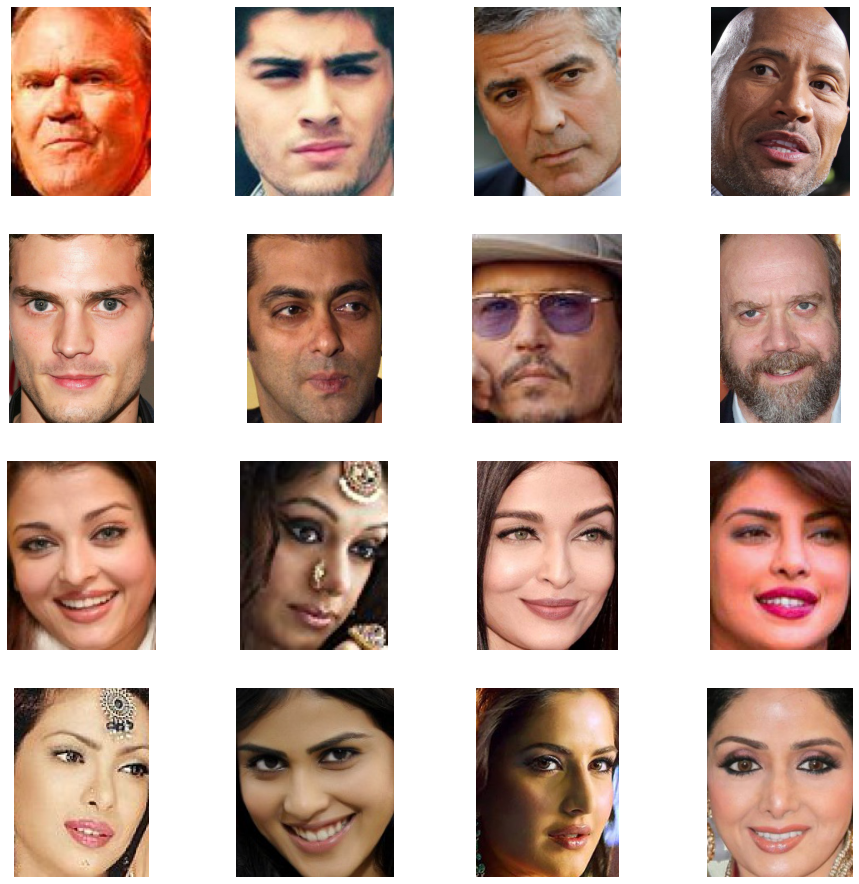

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_man_pix = [os.path.join(train_man_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_woman_pix = [os.path.join(train_woman_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_man_pix+next_woman_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [7]:


# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [10]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


In [11]:
history=model.fit(train_generator,
epochs = 15,
validation_data = validation_generator
)

Epoch 1/15
80/80 [==============================] - 31s 392ms/step - loss: 0.7165 - acc: 0.6756 - val_loss: 0.5881 - val_acc: 0.6824
Epoch 2/15
80/80 [==============================] - 30s 380ms/step - loss: 0.3686 - acc: 0.8413 - val_loss: 0.3025 - val_acc: 0.8853
Epoch 3/15
80/80 [==============================] - 30s 374ms/step - loss: 0.2815 - acc: 0.9025 - val_loss: 0.2823 - val_acc: 0.8882
Epoch 4/15
80/80 [==============================] - 30s 370ms/step - loss: 0.1867 - acc: 0.9312 - val_loss: 0.2825 - val_acc: 0.9029
Epoch 5/15
80/80 [==============================] - 30s 377ms/step - loss: 0.1487 - acc: 0.9413 - val_loss: 0.3194 - val_acc: 0.8912
Epoch 6/15
80/80 [==============================] - 30s 380ms/step - loss: 0.1356 - acc: 0.9488 - val_loss: 0.2185 - val_acc: 0.9265
Epoch 7/15
80/80 [==============================] - 31s 384ms/step - loss: 0.1004 - acc: 0.9638 - val_loss: 0.2477 - val_acc: 0.9088
Epoch 8/15
80/80 [==============================] - 30s 378ms/step - 

<Figure size 432x288 with 0 Axes>

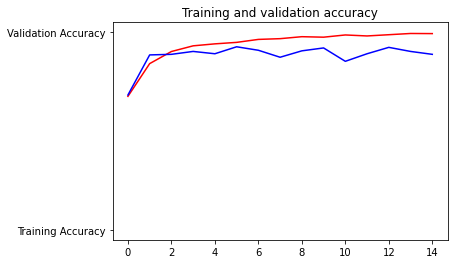

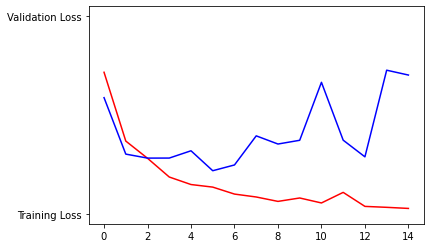

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [13]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
	# load the image
img = load_image('../input/genderdetectionface/dataset1/valid/man/face_190.jpg')
# predict the class
result = model.predict(img)
if(result[0]==0):
    print("MAN")
else:
    print("WOMAN")


Using TensorFlow backend.


MAN
